**Hoja de Trabajo #5** <br>
***Bayes Ingenuo*** <br>
Diego Ruiz 18761, Jose Jorge Perez 18364

In [308]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import metrics
import seaborn as sb
import random
import graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

1. Use los mismos conjuntos de entrenamiento y prueba que utilizó en las dos hojas anteriores.

In [293]:
datos = pd.read_csv("train.csv")

datos = datos.select_dtypes(include='number').dropna(axis=0)
random.seed(42)
print(datos)

datos.groupby('SalePrice').size()

Y = datos.pop("SalePrice")
X = datos
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,train_size=0.7)

        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0          2003          2003       1

2. Elabore un modelo de regresión usando bayes ingenuo (naive bayes), el conjunto de entrenamiento y la variable respuesta SalesPrice. Prediga con el modelo y explique los resultados a los que llega. Asegúrese que los conjuntos de entrenamiento y prueba sean los mismos de las hojas anteriores para que los modelos sean comparables.

In [294]:
LR = LinearRegression().fit(X_train, y_train)

y_pred = LR.predict(X_train)
print("RMSE de entrenamiento:", ((metrics.mean_squared_error(y_train, y_pred))**0.5))
print("R2 de entrenamiento:", (metrics.r2_score(y_train, y_pred)), "\n")

y_pred = LR.predict(X_test)
print("RMSE de prueba:", ((metrics.mean_squared_error(y_test, y_pred))**0.5))
print("R2 de prueba:", (metrics.r2_score(y_test, y_pred)))

RMSE de entrenamiento: 36130.44804286407
R2 de entrenamiento: 0.8209607308354495 

RMSE de prueba: 38343.61211904347
R2 de prueba: 0.752166364229296


3. Haga un modelo de clasificación, use la variable categórica que hizo con el precio de las casas (barata, media y cara) como variable respuesta.

[Text(0, 0, '487'), Text(0, 0, '490'), Text(0, 0, '483')]

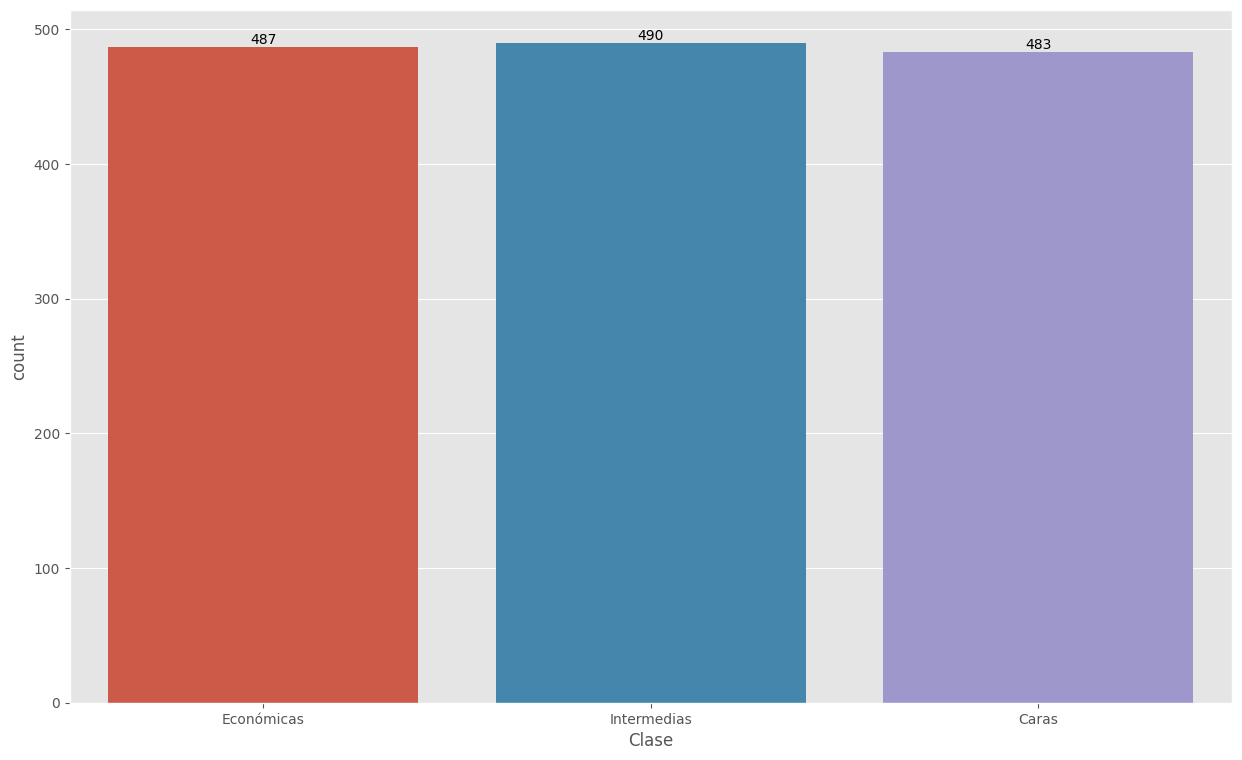

In [295]:
datos1 = pd.read_csv("train.csv", encoding="latin1")
numericas = datos1.select_dtypes(include='number')
numericas = numericas.drop(["Fireplaces", "GarageYrBlt", "Id", "MSSubClass", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "MoSold", "YrSold"], axis=1)

terciles = np.percentile(numericas["SalePrice"], [33.33, 66.67])
limite_economicas = terciles[0]
limite_caras = terciles[1]
numericas["Clase"] = pd.cut(numericas["SalePrice"], 
                            bins=[0, limite_economicas, limite_caras, float("inf")], 
                            labels=["Económicas", "Intermedias", "Caras"])

ax = sb.countplot(data=numericas, x="Clase")
ax.bar_label(ax.containers[0])


In [296]:
numericastmp = numericas.dropna()
Y = numericastmp.pop("Clase")
X = numericastmp
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,train_size=0.7)



gaussian = GaussianNB().fit(X_train, y_train)

y_predTRAIN = gaussian.predict(X_train)
print('Model accuracy score: {0:0.4f}'. format(metrics.accuracy_score(y_train, y_predTRAIN)))

Model accuracy score: 0.8612


4. Utilice los modelos con el conjunto de prueba y determine la eficiencia del algoritmo para predecir y clasificar.

In [297]:
y_predTEST = gaussian.predict(X_test)
print('Model accuracy score: {0:0.4f}'. format(metrics.accuracy_score(y_test, y_predTEST)))

Model accuracy score: 0.8384


El modelo es muy bueno par predecir y clasificar, mostrando un accuracy de 0.8445 en el conjunto de entrenamiento y manteniendo un desempeño muy similar en el conjunto de prueba con un 0.8357.

5. Analice los resultados del modelo de regresión. ¿Qué tan bien le fue prediciendo?

Los resultados de prediccion del modelo de regresion fueron mucho peores que los del Naive Bayes, mostrando un R2 de prueba de 0.69. Por esta razon se llega a la conclusion de que es un algoritmo decente para predecir pero no es ideal, por lo que se recomienda el uso de otros modelos.

6. Compare los resultados con el modelo de regresión lineal y el árbol de regresión que hizo en las hojas pasadas. ¿Cuál funcionó mejor?

El arbol de regresion funciono un poco mejor a la hora de predecir ya que se accuracy fue alrededor de 0.74, mientras que el resultado de modelo actual es de 0.69, lo cual refuerza que no es el mejor algoritmo para predecir y en muchas ocasiones otros algritmos tendran mejores resultados.

7. Haga un análisis de la eficiencia del modelo de clasificación usando una matriz de confusión. Tenga en cuenta la efectividad, donde el algoritmo se equivocó más, donde se equivocó menos y la importancia que tienen los errores.

In [298]:
cm = metrics.confusion_matrix(y_test, y_predTEST)
print("Confusion Matrix\n",cm)
print("\nAnalisis de eficacia\n",metrics.classification_report(y_test, y_predTEST, digits=3))


Confusion Matrix
 [[103   0  11]
 [  2 116  10]
 [  7  28  82]]

Analisis de eficacia
               precision    recall  f1-score   support

       Caras      0.920     0.904     0.912       114
  Económicas      0.806     0.906     0.853       128
 Intermedias      0.796     0.701     0.745       117

    accuracy                          0.838       359
   macro avg      0.840     0.837     0.837       359
weighted avg      0.839     0.838     0.837       359



El algoritmo se equivoco mas en clasificar las intermedias ya que a algunas les ponia un poco mas de la cuenta de SalePrice y a muchas otras les ponia un precio menor. Estos errores son de gran importancia ya que hacen que el algoritmo en general sufra mucho en su precision general, a pesar de ser muy bueno para clasificar casas Caras. 

8. Analice el modelo. ¿Cree que pueda estar sobre ajustado?

In [299]:
cm = metrics.confusion_matrix(y_train, y_predTRAIN)
print("Confusion Matrix\n",cm)
print("\nAnalisis de eficacia\n",metrics.classification_report(y_train, y_predTRAIN, digits=3))

Confusion Matrix
 [[241   0  37]
 [  1 292  11]
 [  7  60 187]]

Analisis de eficacia
               precision    recall  f1-score   support

       Caras      0.968     0.867     0.915       278
  Económicas      0.830     0.961     0.890       304
 Intermedias      0.796     0.736     0.765       254

    accuracy                          0.861       836
   macro avg      0.864     0.855     0.857       836
weighted avg      0.865     0.861     0.860       836



Como se puede observar al obtener el desempeño del conjunto de entrenamiento y el del conjunto de prueba, y se puede observar que tanto la precision como el recall son muy parecidos, por lo que no se cree que pueda estar sobreajustado.

9. Haga un modelo usando validación cruzada, compare los resultados de este con los del modelo anterior. ¿Cuál funcionó mejor?

In [374]:
clf = LogisticRegression(random_state=42)
scores = cross_val_score(clf, X, Y, cv = 5)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())

Cross Validation Scores:  [0.9707113  0.9623431  0.958159   0.9790795  0.92468619]
Average CV Score:  0.9589958158995815


C:\Users\yeyoc\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yeyoc\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

El modelo de validacion cruzada presenta una gran mejora sobre el modelo anterior, con resultados muy cercanos a la exactitud.

10. Compare la eficiencia del algoritmo con el resultado obtenido con el árbol de decisión (el de clasificación) y el modelo de random forest que hizo en la hoja pasada. ¿Cuál es mejor para predecir? ¿Cuál se demoró más en procesar?

En eficiencia, el modelo de clasificación es mucho mejor que el modelo de random forest generado en la hoja pasada, además, ambos se tardan mas o menos el mismo tiempo, por lo que se determina que el modelo de la hoja actual es superior, al menos para este set de datos.